<a href="https://colab.research.google.com/github/loguansiang/fyp/blob/main/lstm_and_grus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras import optimizers
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout
from keras import optimizers


In [4]:
days_before = 180
days_ahead = 10
num_period = 20
EPOCHS = 50

In [5]:
url = 'https://raw.githubusercontent.com/loguansiang/fyp/main/SAND%20fyp.csv'
df = pd.read_csv(url)
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-14,0.086577,0.086577,0.059597,0.065645,0.065645,118988161
1,2020-08-15,0.066077,0.069509,0.048985,0.050964,0.050964,36213441
2,2020-08-16,0.051438,0.069508,0.048064,0.060847,0.060847,33023213
3,2020-08-17,0.060847,0.065073,0.052525,0.053999,0.053999,11686493
4,2020-08-18,0.053784,0.060990,0.050675,0.051700,0.051700,7401293
...,...,...,...,...,...,...,...
607,2022-04-13,2.781983,2.886945,2.751847,2.869923,2.869923,321784424
608,2022-04-14,2.869366,2.916186,2.714203,2.780882,2.780882,349909147
609,2022-04-15,2.781060,2.820187,2.755915,2.803639,2.803639,189256519
610,2022-04-16,2.803614,2.901280,2.777383,2.822680,2.822680,234480315


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)


In [7]:
df = df['Close']

In [8]:
df

Date
2020-08-14    0.065645
2020-08-15    0.050964
2020-08-16    0.060847
2020-08-17    0.053999
2020-08-18    0.051700
                ...   
2022-04-13    2.869923
2022-04-14    2.780882
2022-04-15    2.803639
2022-04-16    2.822680
2022-04-17    2.790278
Name: Close, Length: 612, dtype: float64

In [9]:
#Data normalization
array = df.values.reshape(df.shape[0],1)
scl = MinMaxScaler()
array = scl.fit_transform(array)


In [10]:
division = len(array) - num_period*days_ahead
division



412

In [11]:
leftover = division%days_ahead+1
leftover


3

In [12]:
test = array[division-days_before:]
train = array[leftover:division]

In [13]:
len(test)

380

In [14]:
len(test)


380

In [15]:
def processData(data, days_before, days_ahead, jump=1):
   x,y = [],[]
   for i in range(0,len(data)-days_before-days_ahead+1, jump):
      x.append(data[i:(i+days_before)])
      y.append(data[(i+days_before):(i+days_before+days_ahead)])
   return np.array(x), np.array(y)

In [16]:
x,Y = processData(train, days_before, days_ahead)
y = np.array([list(a.ravel()) for a in Y])

In [17]:
def lstm_model(days_before, days_ahead):
   lstm_model = Sequential()
   lstm_model.add(LSTM(256, input_shape=(days_before,1), return_sequences=True))
   lstm_model.add(Dropout(0.4))
   lstm_model.add(LSTM(128, input_shape=(256,1),return_sequences=True))
   lstm_model.add(Dropout(0.4))
   lstm_model.add(LSTM(64, input_shape=(128,1), return_sequences=True))
   lstm_model.add(LSTM(64, input_shape=(64,1)))
   lstm_model.add(Dropout(0.2))
   lstm_model.add(Dense(days_ahead, activation='relu'))
   lstm_model.compile(loss='mean_squared_error', optimizer='adam')
   return lstm_model

In [18]:
print('Creating LSTM model')
lstm_model = lstm_model(days_before, days_ahead)

Creating LSTM model


In [19]:
x_train, x_validate, y_train, y_validate = train_test_split(x, y, test_size = 0.2, random_state=42)

In [20]:
def train_lstm(lstm_model,x_train, x_validate, y_train, y_validate, EPOCHS):
   print('Train on LSTM')
   history = lstm_model.fit(x_train, y_train, epochs=EPOCHS, validation_data=(x_validate, y_validate), shuffle=True, batch_size=512, verbose=2)
   save_model_lstm = 'model/lstm_model_3.h5'
   lstm_model.save(save_model_lstm)
   print("Model saved to {}".format(save_model_lstm))
   plt.plot(history.history['loss'], label='loss')
   plt.plot(history.history['val_loss'], label='val_loss')
   plt.legend(loc='best')
   plt.savefig('model/lossfig_lstm.png')
   state =  'Training LSTM Done'
   plt.close()
   return state
   


In [21]:
state = train_lstm(lstm_model,x_train, x_validate, y_train, y_validate, EPOCHS)
print(state)

Train on LSTM
Epoch 1/50
1/1 - 15s - loss: 0.0041 - val_loss: 0.0030 - 15s/epoch - 15s/step
Epoch 2/50
1/1 - 4s - loss: 0.0031 - val_loss: 0.0021 - 4s/epoch - 4s/step
Epoch 3/50
1/1 - 4s - loss: 0.0022 - val_loss: 0.0022 - 4s/epoch - 4s/step
Epoch 4/50
1/1 - 4s - loss: 0.0022 - val_loss: 0.0018 - 4s/epoch - 4s/step
Epoch 5/50
1/1 - 4s - loss: 0.0017 - val_loss: 0.0015 - 4s/epoch - 4s/step
Epoch 6/50
1/1 - 4s - loss: 0.0015 - val_loss: 0.0013 - 4s/epoch - 4s/step
Epoch 7/50
1/1 - 6s - loss: 0.0014 - val_loss: 0.0013 - 6s/epoch - 6s/step
Epoch 8/50
1/1 - 4s - loss: 0.0014 - val_loss: 0.0012 - 4s/epoch - 4s/step
Epoch 9/50
1/1 - 4s - loss: 0.0013 - val_loss: 0.0011 - 4s/epoch - 4s/step
Epoch 10/50
1/1 - 4s - loss: 0.0012 - val_loss: 0.0010 - 4s/epoch - 4s/step
Epoch 11/50
1/1 - 5s - loss: 0.0011 - val_loss: 9.7679e-04 - 5s/epoch - 5s/step
Epoch 12/50
1/1 - 5s - loss: 0.0010 - val_loss: 9.9439e-04 - 5s/epoch - 5s/step
Epoch 13/50
1/1 - 4s - loss: 0.0010 - val_loss: 0.0010 - 4s/epoch - 4s/s

In [73]:
import tensorflow as tf
from tensorflow.keras import layers

def mean_absolute_scaled_error(ytest, xtest_lstm):
  #Implement MASE 
  mase = tf.reduce_mean(tf.abs(ytest, xtest_lstm))
  return mase

def predict_lstm(lstm_model, xtest, ytest):
   lstm_model = load_model(lstm_model)
   xtest_lstm = lstm_model.predict(xtest)
   xtest_lstm = xtest_lstm.ravel()
   ytest = np.reshape(ytest, (200,1))
   xtest_lstm = np.reshape(xtest_lstm, (200,1))
   lstm_mse = metrics.mean_squared_error(ytest, xtest_lstm)
   lstm_mae = metrics.mean_absolute_error(ytest, xtest_lstm)
   lstm_mape = metrics.mean_absolute_percentage_error(ytest, xtest_lstm)
   lstm_mase = mean_absolute_scaled_error(ytest, xtest_lstm)
   lstm_rmse = tf.sqrt(lstm_mse)
   return xtest_lstm, lstm_mse,lstm_mae,lstm_mape,lstm_mase,lstm_rmse

In [74]:
xtrain, ytrain = processData(train, days_before, days_ahead, days_ahead)
xtest, ytest = processData(test, days_before, days_ahead, days_ahead)


In [75]:
lstm_model = 'model/lstm_model_3.h5'

In [77]:
xtest_lstm, lstm_mse,lstm_mae,lstm_mape,lstm_mase,lstm_rmse= predict_lstm(lstm_model, xtest, ytest)
print('LSTM\nMSE: %f ' %(lstm_mse))
print('MAE: %f ' %(lstm_mae))
print('MAPE: %f ' %(lstm_mape))
print('MASE: %f ' %(lstm_mase))
print('RMSE: %f ' %(lstm_rmse))

LSTM
MSE: 0.055489 
MAE: 0.189446 
MAPE: 0.410664 
MASE: 0.423108 
RMSE: 0.235561 


In [78]:
y = np.concatenate((ytrain, ytest), axis=0)

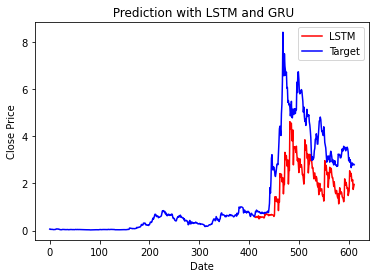

In [79]:
plt.plot([x for x in range(412,612)], scl.inverse_transform(xtest_lstm.reshape(-1,1)), color='r', label='LSTM')
plt.plot(scl.inverse_transform(array), color='b', label='Target')

plt.title(' Prediction with LSTM and GRU')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.legend(loc='best')
plt.savefig('model/FigurePredicted.png')
plt.show()